## 1. Imports

In [1]:
# !pip install wordcloud 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from wordcloud import WordCloud

## 2. Read CSVs

In [3]:
millenials_df = pd.read_csv('../data/millenials_clean.csv')
genz_df = pd.read_csv('../data/genz_clean.csv')
full_df = pd.read_csv('../data/full_df.csv')

## 3. HeatMaps

create heatmaps to inspect the correlations between numeric features.

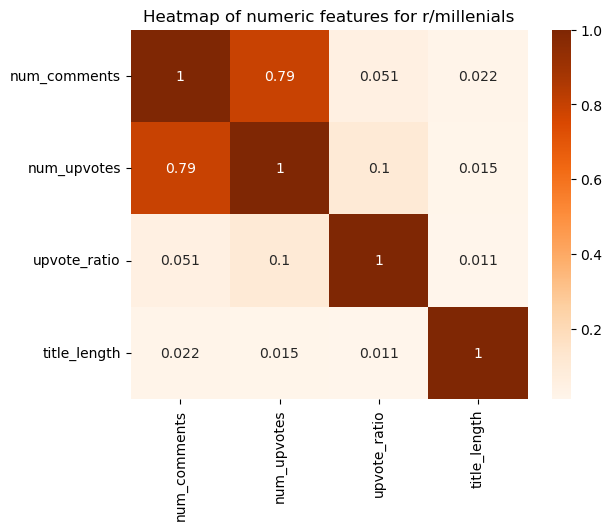

In [4]:
sns.heatmap(millenials_df[['num_comments', 'num_upvotes', 'upvote_ratio', 'title_length']].corr(), cmap='Oranges', annot=True);
plt.title('Heatmap of numeric features for r/millenials')
plt.savefig('../images/heatmap_millenials.png')

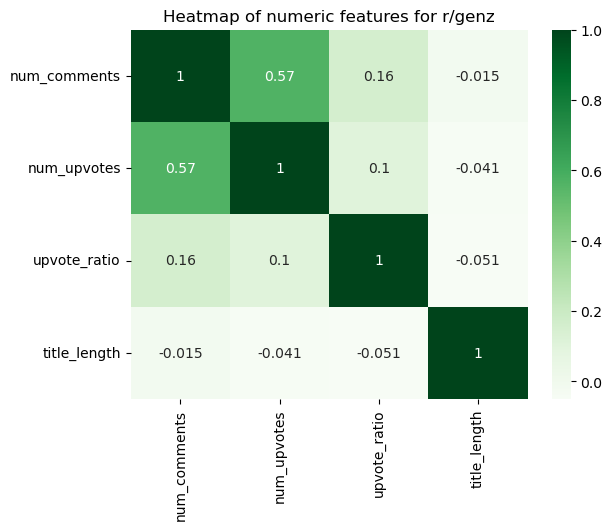

In [5]:
sns.heatmap(genz_df[['num_comments', 'num_upvotes', 'upvote_ratio', 'title_length']].corr(), cmap='Greens', annot=True);
plt.title('Heatmap of numeric features for r/genz')
plt.savefig('../images/heatmap_genz.png')

For both subreddits, the number of comments positively correlates to the number of upvotes, which reasonably indicates that there are a lot of activities (i.e. commments and upvotes) for popular posts. 

### 4. Pivot Tables

create Pivot Tables to analyze the segment of the day and day of the week in which the top 1000 posts were created in each subreddits. The pivot table cells are created by counting the number of posts using the post 'id'.
This indicates when millenials and genz redditors are most active on their subreddits.

source: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

**both subreddits are more active during weeknights and weekends.**


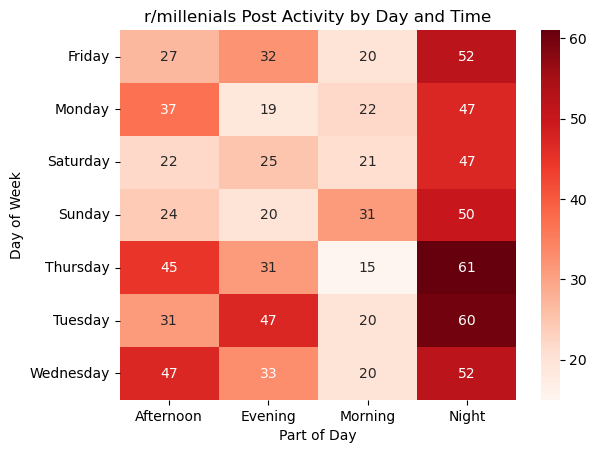

In [6]:
# Grouping data to count posts in each part of day across each day of the week
activity_counts = millenials_df.pivot_table(index='day_of_week', columns='segment_of_day', values='id', aggfunc='count')

sns.heatmap(activity_counts, annot=True, cmap='Reds')
plt.title('r/millenials Post Activity by Day and Time')
plt.xlabel('Part of Day')
plt.ylabel('Day of Week')
plt.savefig('../images/pivot_tables_millenials.png')

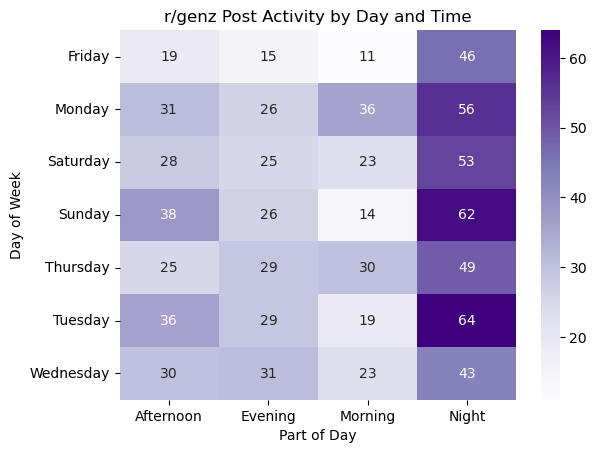

In [7]:
# Grouping data to count posts in each part of day across each day of the week
activity_counts = genz_df.pivot_table(index='day_of_week', columns='segment_of_day', values='id', aggfunc='count')

sns.heatmap(activity_counts, annot=True, cmap='Purples')
plt.title('r/genz Post Activity by Day and Time')
plt.xlabel('Part of Day')
plt.ylabel('Day of Week')
plt.savefig('../images/pivot_tables_genz.png')

### Post Titles Most Frequent Words

Use CountVectorizer to count the number of times a word appears in the post titles for each subreddit, Then plot the top 20 most frequently occuring words in each subreddit and create a word cloud of those words.

source for word cloud: https://www.datacamp.com/tutorial/wordcloud-python

create a custom stop_words list that includes some mispelling of "millenials" and 'genz' and 'don'. These words will be excluded from the CountVectorizer.

In [8]:
custom_stop_words = ENGLISH_STOP_WORDS.union({'millenials','millennial', 'millenial', 'gen', 'don', 'did', 'does', 'like'})

In [9]:
countvect = CountVectorizer(
    max_features=50,
    ngram_range=(1,2),
    stop_words= list(custom_stop_words)
)

In [10]:
millenials_title_vectorized = countvect.fit_transform(millenials_df['title'])

In [11]:
# Convert matrix to a dense format and sum occurrences
millenials_word_counts = millenials_title_vectorized.sum(axis=0)
millenials_word_counts = [(word, millenials_word_counts[0, idx]) for word, idx in countvect.vocabulary_.items()]

# Sort the word counts by frequency
millenials_sorted_word_counts = sorted(millenials_word_counts, key=lambda x: x[1], reverse=True)

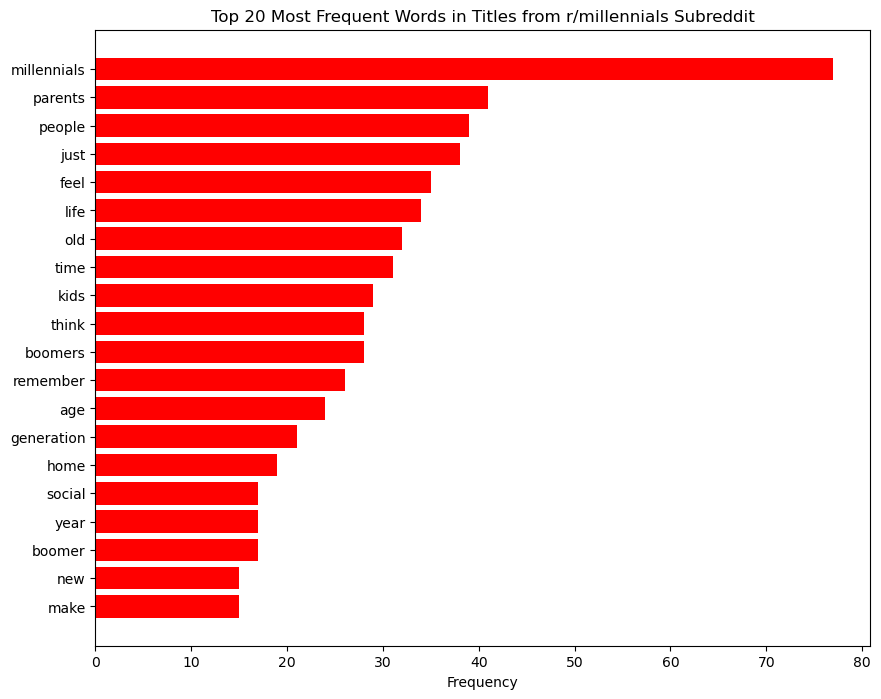

In [12]:
# Get top 20 words
millenials_top_words = millenials_sorted_word_counts[:20]

# Unzip the words and their counts
words, counts = zip(*millenials_top_words)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='red')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Titles from r/millennials Subreddit')
plt.gca().invert_yaxis()  # make sure to show the most frequent words on top
plt.savefig('../images/top20words_millenials.png')

#### r/genz Top 20 words in Post Titles

In [13]:
genz_title_vectorized = countvect.fit_transform(genz_df['title'])

In [14]:
# Convert matrix to a dense format and sum occurrences
genz_word_counts = genz_title_vectorized.sum(axis=0)
genz_word_counts = [(word, genz_word_counts[0, idx]) for word, idx in countvect.vocabulary_.items()]

# Sort the word counts by frequency
genz_sorted_word_counts = sorted(genz_word_counts, key=lambda x: x[1], reverse=True)

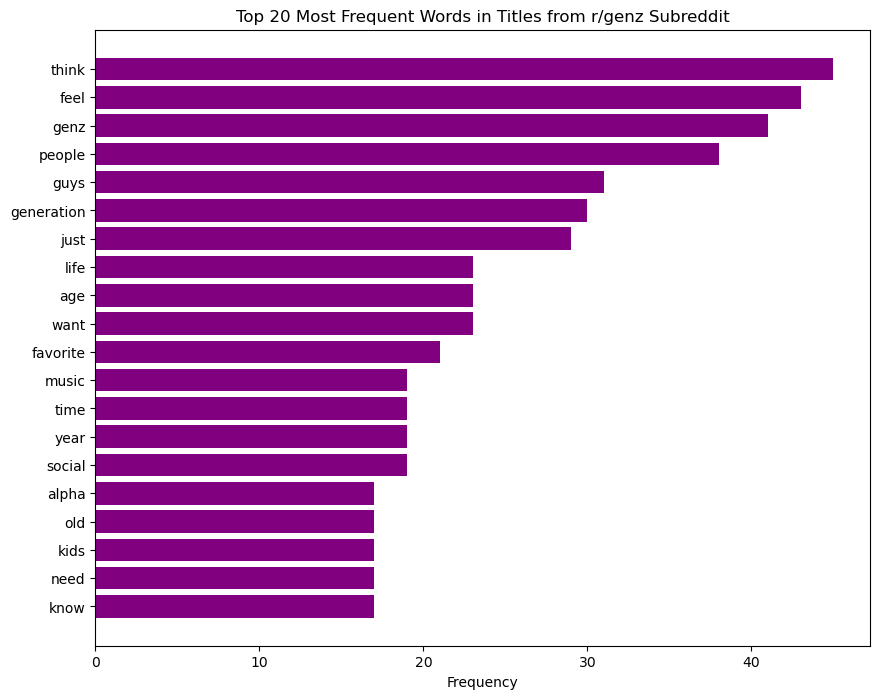

In [15]:
# Get top 20 words
genz_top_words = genz_sorted_word_counts[:20]

# Unzip the words and their counts
words, counts = zip(*genz_top_words)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='purple')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Titles from r/genz Subreddit')
plt.gca().invert_yaxis()
plt.savefig('../images/top20words_genz.png')

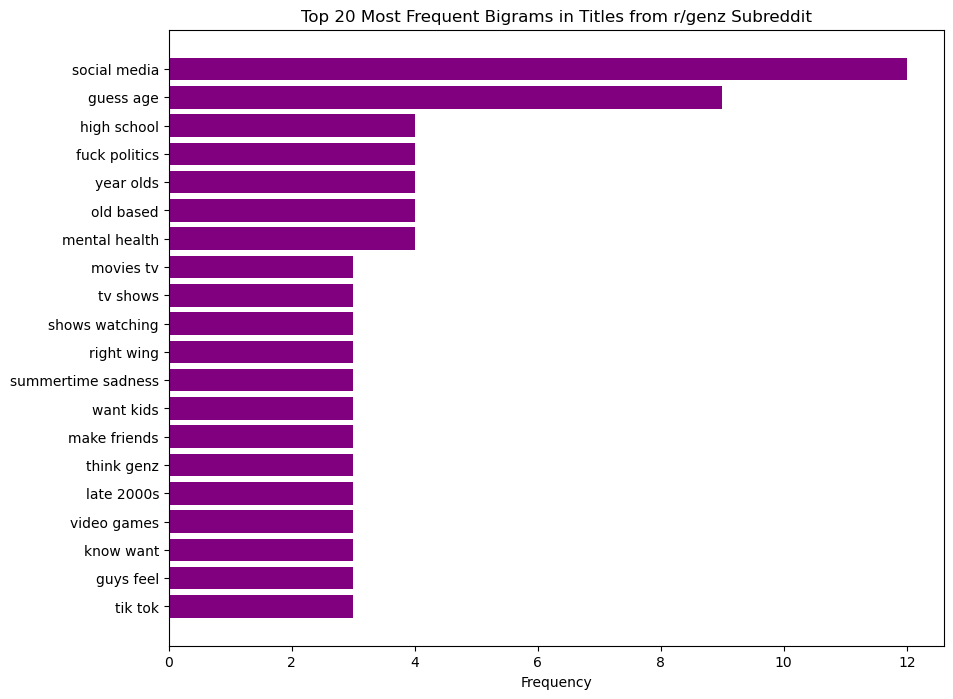

In [19]:
genz_title_vectorized = countvect_bigrams.fit_transform(genz_df['title'])
# Convert matrix to a dense format and sum occurrences
genz_word_counts = genz_title_vectorized.sum(axis=0)
genz_word_counts = [(word, genz_word_counts[0, idx]) for word, idx in countvect_bigrams.vocabulary_.items()]

# Sort the word counts by frequency
genz_sorted_word_counts = sorted(genz_word_counts, key=lambda x: x[1], reverse=True)

# Get top 20 words
genz_top_words = genz_sorted_word_counts[:20]

# Unzip the words and their counts
words, counts = zip(*genz_top_words)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='purple')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams in Titles from r/genz Subreddit')
plt.gca().invert_yaxis()
plt.savefig('../images/top20words_bigrams_genz.png')

## Top 50 Bigrams Word Clouds

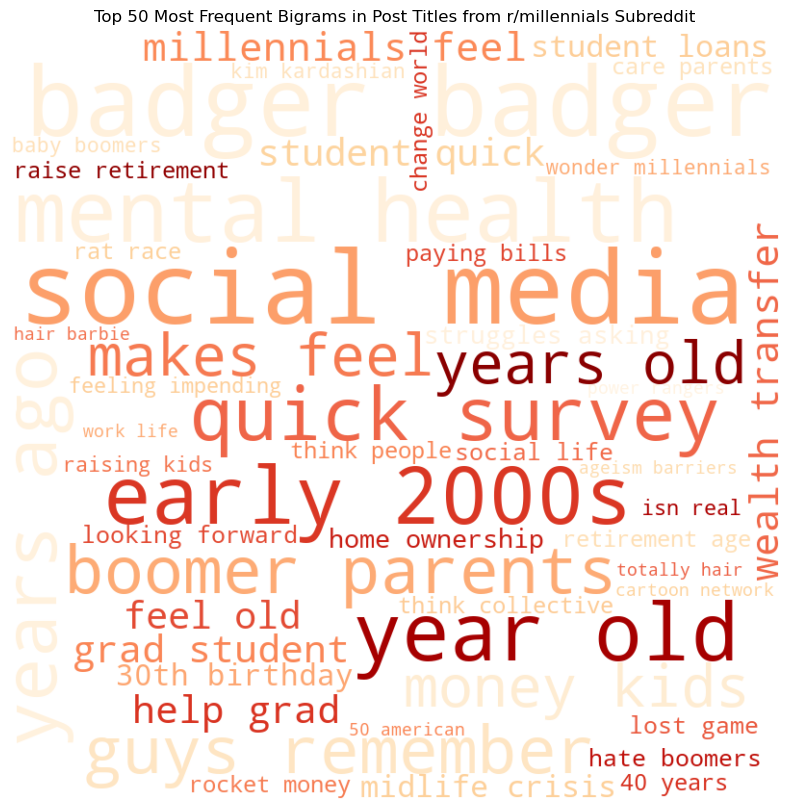

In [22]:
# Convert list of words and counts back into a dictionary for WordCloud
millenials_word_freq = dict(millenials_sorted_word_counts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='OrRd').generate_from_frequencies(millenials_word_freq)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Top 50 Most Frequent Bigrams in Post Titles from r/millennials Subreddit')
plt.savefig('../images/top50_bigrams_wordscloud_millenials.png')

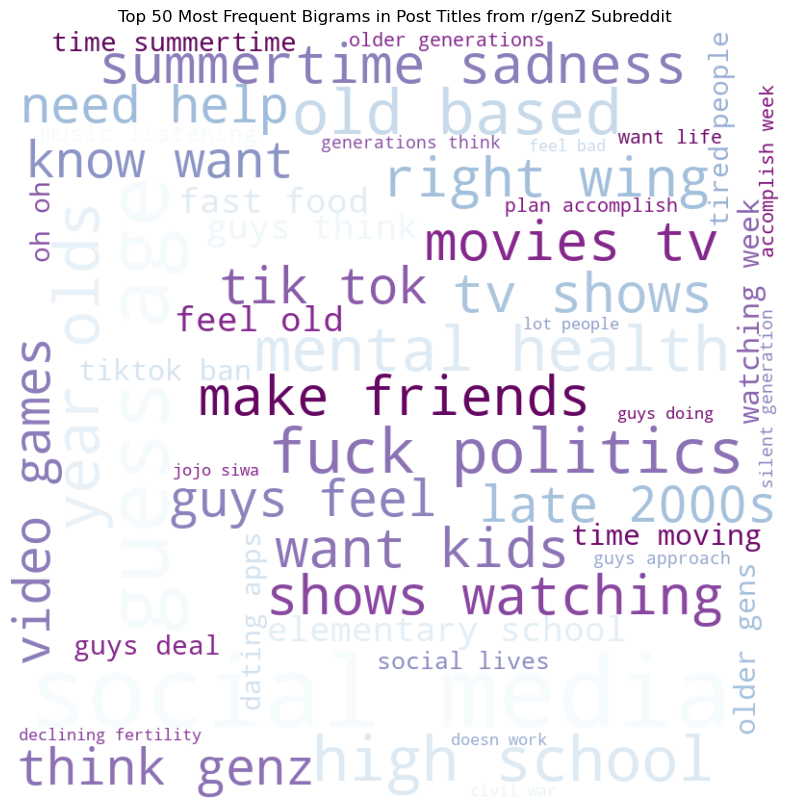

In [23]:
# Convert list of words and counts back into a dictionary for WordCloud
genz_word_freq = dict(genz_sorted_word_counts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='BuPu').generate_from_frequencies(genz_word_freq)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Top 50 Most Frequent Bigrams in Post Titles from r/genZ Subreddit')
plt.savefig('../images/top50_bigrams_wordscloud_genz.png')